# Exercise 5 - Introduction to Filtering

## Objectives
- To learn about digital filters
- To investigate a direct-method of filtering in the frequency-domain
- To learn about filters as LTI systems


In [1]:
import os
os.makedirs('results/ex5', exist_ok=True)

## Lab Exercise

### What is a Digital Filter?

The purpose of a digital filter, like any other filters, is to enhance and suppress some frequency components in a signal. This is referred to as frequency selectivity. In this lab, we will restrict ourselves to filters that are linear and time-invariant. 
>- A filter is linear if the response to the sum of the two inputs is equals to the sum of the individual responses taken separately.
>- A time-invariant filter is one whose characteristics do not alter with time. 

We make these two restrictions because they greatly simplify the mathematics involved. Linear time-invariant filters may also be made from analogue components such as resistors, capacitors, inductors and op-amps.

<img src="img/ex5_rlc.svg" alt="Drawing" style="width: 650px"/>
<center>Figure 5.1: Series RLC circuit </center>

**Question 5.1** Derive the frequency response, $H(\omega)$, of the RLC circuit in Fig. 5.1.

This type of filter is a 2nd order **analogue** low-pass filter; in the remainder of this lab we will focus mainly on **digital** filters. You can learn about how to convert an analogue filter into a digital one in the third year DSP course.

### Direct Method in the Frequency-Domain

An obvious way to filter a signal is to modify its frequency components or spectrum. The steps are:

1. Take the DFT of the signal to obtain its frequency-domain representation or spectrum.
2. Set unwanted components in the spectrum to zero.
3. Take the inverse DFT of the modified spectrum.

### Lab Exercise

Let us filter part of a song, `track_1.wav`, by removing all components above 300 Hz. Before this, listen to the original track so that you can compare it with the filtered signal:

<audio controls src="files/track_1.wav"> 
</audio>

To generate the filtered waveform, run the following code and listen to the output

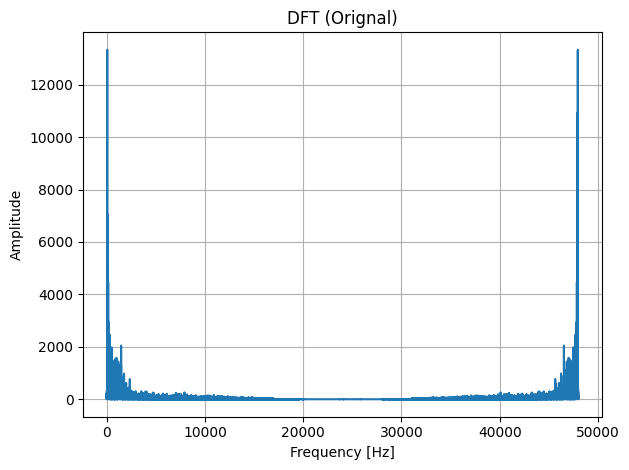

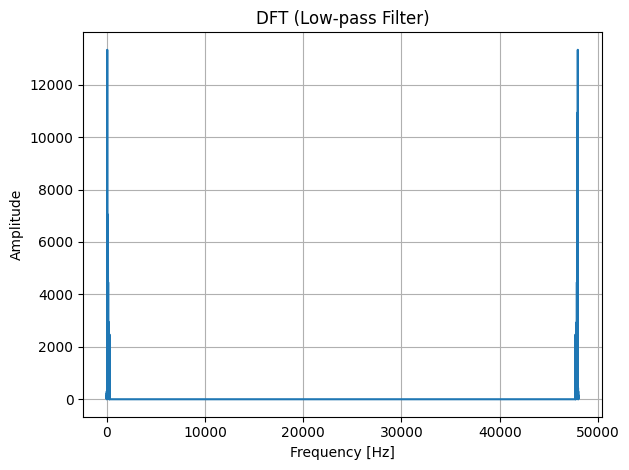

Filtered Audio Output (Low-pass):


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

from scipy.fft import fft
from scipy.fft import ifft
from functions.lab_functions import plot_signal

x, fs = sf.read('files/track_1.wav') 
Tsamp = 1/fs
Nsamp = len(x)

X = fft(x);

cutoff = 300
n = round(cutoff/fs*Nsamp) # calculate the frequency index

f_step = np.arange(0, fs, fs/Nsamp);

plt = plot_signal(f_step, abs(X), title='DFT (Orignal)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()

X[n:-n] = 0; # Set unwanted frequencies to zero

plt = plot_signal(f_step, abs(X), title='DFT (Low-pass Filter)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()

y = ifft(X);

sf.write('results/ex5/track_1_lowpass.wav', np.real(y), fs)
print('Filtered Audio Output (Low-pass):')
ipd.Audio('results/ex5/track_1_lowpass.wav') # display audio player

**Question 5.2**: Now try to modify the code below to create a high-pass filter by removing all components below 300 Hz. Listen to the output `track_1_highpass.wav`

>**GTA Tip**
>
>Note that the filtered waveform should still be real. If your result is not real it is because you have destroyed the conjugate symmetric property in the frequency domain that makes the signal real in the time domain.


In [4]:
# add your code here

**Question 5.3**: What are the disadvantages of filtering in the frequency domain?


It is useful to know that if a signal $x[n]$ has a special property in the time domain then there will be a corresponding property in the frequency domain, $X(e^{j\Omega}) \text{ and } X[k]$ (and vice versa).

| One Domain           | Other Domain             
| -------------------- | ------------------------ 
| Discrete             | Periodic                 
| Symmetric            | Symmetric                 
| Antisymmetric        | Antisymmetric             
| Real                 | Conjugate Symmetric       
| Imaginary            | Conjugate Antisymmetric   
| Real & Symmetric     | Real & Symmetric          
| Real & Antisymmetric | Imaginary & Antisymmetric
 
$\begin{align}
\quad \text{Symmetric: } &x[n]=x[-n]\\
&X(e^{j\Omega})=X(e^{-j\Omega})\\
&X[k]=X[(-k)_{\text{mod} N}]=X[N-k] \text{ for } k>0
\end{align}$

$\quad$ Conjugate Symmetric: $x[n]=x^*[-n]$ 

$\quad$ Conjugate Antisymmetric: $x[n]=-x^*[-n]$ 

The filters we have just created using the direct method above have the following frequency responses
<table><tr>
<td> <img src="img/ex4_1.png" alt="Drawing" style="width: 420px;"/> </td>
<td> <img src="img/ex4_2.png" alt="Drawing" style="width: 420px;"/> </td>
</tr></table>

**Question 5.4**: In the plot above, the frequency response is perfect at the sample points but not between them. Can you explain why?

### Filtering using LTI system properties
We have now seen how we can filter a signal by setting all unwanted frequency components (**direct method**) but this is not the only, nor the best, way to filter a signal. Instead, you can view a filter as an LTI system with an impulse/frequency response which will attenuate or enhance certain frequencies.

<img src="img/ex5_1.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 5.2: Impulse response of a filter</center>

**Question 5.5** We now know that $h[n]$ is the impulse response of a filter. How can you obtain its frequency response $H(j\Omega)$? Give the appropriate formula.

Let us consider this simple filter with impulse response
$$h[n]=\big[0.25,\, 0.25,\, 0.25,\, 0.25\big]$$

**Question 5.6** What is the frequency response of this filter? Is it low-pass or high-pass?

**Question 5.7** Use the frequency response to determine $y[n]$ for $x[n]=\sin(\frac{\pi}{2} n)$. Check your answer using the code cell below.

In [20]:
# add your code here

Remember that convolution in the time-domain is equivalent to multiplication in the frequency-domain; this can also be used to filter signals in the frequency domain. 

**Bonus Question** Repeat the previous question using a frequency-domain implementation. You can use Python's `fft` and `ifft` functions to obtain the DFT and inverse DFT of $x[n],h[n]$ and $y[n]$. Make sure to zero-pad $x[n]$ and $h[n]$ such that their lenghts are `len(x)+len(h)-1`.

The filter described here has a very simple form. In practice, you can use filter design techniques to create filters with more sofisticated frequency responses, which we will do in the next exercise.